In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/task-1-result/finance.new.index
/kaggle/input/task-1-result/chunks.new.jsonl


In [2]:
pip install langgraph typing faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 51.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.6/449.6 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 10.0 MB/s eta 0:00:00
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26304 sha256=cf9ba0238c31315130d3fa2948c122f2e5b067d18f38aeec303c2da4048968a6
  Stored in directory: /root/.cache/pip/wheels/9d/67/2f/53e3ef32ec48d11d7d60245255e2d71e908201d20c880c08ee
Successfully built typing
  Attempting uninstall: la

In [3]:
pip install -U langchain-openai langchain-core langchain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 999.0/999.0 kB 37.2 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.91.0
    Uninstalling openai-1.91.0:
      Successfully uninstalled openai-1.91.0
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.3.8
    Uninstalling langchain-text-splitters-0.3.8:
      Successfully uninstalled langchain-text-splitters-0.3.8
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.26
    Uninstalling langchain-0.3.26:
      Successfully uninstalled langchain-0.3.26
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 35.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
datasets 3.6.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.5.1 which is incompatible.
google-colab 1.0.0 requires google-auth==2.38.0, but you have google-auth 2.40.3 which is incompatible.
google-colab 1.0.0 requires notebook==6.5.7, but you have notebook 6.5.4 which is incompatible.
google-colab 

Getting my api.

Enter your API Key

In [5]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
api_key_1 = user_secrets.get_secret("OpenAI_api_key")
os.environ["OPENAI_API_KEY"] = api_key_1

In [6]:
# Importing LLM models
from langchain_openai import ChatOpenAI
llm_1=ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0,
)
llm_2=ChatOpenAI(
    model="gpt-3.5-turbo",
    temperature=0,
)

In [7]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal, Optional, List, Dict, Any
from pydantic import BaseModel, Field

In [8]:
# Defining State
class AgentState(TypedDict):
    query: str
    active_agent: str
    last_agent: Optional[str]=None

    retrieved_chunks: Optional[List[Dict]] = [] 
    retrieved_metadata: Optional[List[Dict]] = []
    
    current_summary: Optional[str] = None     
    
    extracted_entities: Optional[Dict[str, Any]] = None
    reasoning_trace: List[str] = [] 
    
    next_agent: Optional[str] = None            
    final_answer: Optional[str] = None          
    error: Optional[str] = None  
    trace: List[Dict[str, Any]]
    

In [82]:
# Defining Controller Node
from typing import Dict, Any
import json
from pydantic import BaseModel, Field

class ControllerDecision(BaseModel):
    next_agent: str = Field(description="Next agent to call. One of: retriever, table, math, web_search, aggregator.")
    reasoning: str = Field(description="Reasoning for choosing this agent.")

structured_llm_cont = llm_1.with_structured_output(ControllerDecision)

async def ControllerAgent(state: AgentState):
    """
    Hybrid controller that decides next agent:
    Uses deterministic logic when possible.
    Falls back to LLM reasoning only if needed.
    """

    query = state.get("query", "")
    state.setdefault("trace", [])
    state.setdefault("reasoning_trace", [])

    called_agents = [t["agent"] for t in state["trace"] if "agent" in t]
    available_agents = ["retriever", "table", "math", "web_search"]
    remaining_agents = [a for a in available_agents if a not in called_agents]

    retrieved_chunks = state.get("retrieved_metadata", []) or []
    next_agent = None
    reasoning = ""

    # Deterministic Logic 
    if "aggregator" in called_agents:
        next_agent = "END"
        reasoning = "Aggregator has completed; summarizer will handle output next."
    
    elif retrieved_chunks and any("table" in c.get("type", "").lower() for c in retrieved_chunks) \
         and "table" not in called_agents and "retriever" in called_agents:
        next_agent = "table"
        reasoning = "Retrieved chunks contain tables, so table agent should handle extraction next."

    elif all(a in called_agents for a in ["retriever", "math", "table"]):
        next_agent = "aggregator"
        reasoning = "All major agents have completed their tasks, now aggregator should combine results."

    # LLM logic
    else:
        allowed_agents = remaining_agents + ["aggregator"]
        compact_state = {
            "called_agents": called_agents,
            "retrieved_chunks_count": len(retrieved_chunks),
            "retrieved_metadata": state.get("retrieved_metadata", []),
            "extracted_entities": state.get("extracted_entities", {}),
            "current_summary": state.get("current_summary"),
        }

        prompt = f"""
You are a decision controller in a multi-agent system.

Available agents: {allowed_agents}

Each agent role:
- retriever: fetch relevant text chunks.
- table: interpret data from tables.
- math: perform numerical operations.
- web_search: perform web search releted to query(Select when only neccesaary,retriver results not sufficient).
- aggregator: combine results from previous agents.

Current state:
{json.dumps(compact_state, indent=2)}

User query:
"{query}"

Pick the next logical agent to call.
"""
        decision = await structured_llm_cont.ainvoke(prompt)
        next_agent = decision.next_agent
        reasoning = decision.reasoning

    state["reasoning_trace"].append(reasoning)
    state["trace"].append({
        "agent": "controller",
        "decision": next_agent,
        "reasoning": reasoning,
    })
    state["next_agent"] = next_agent

    return state


In [83]:
import faiss
import json
import numpy as np
import os
from sentence_transformers import SentenceTransformer

FAISS_INDEX_PATH = os.getenv("FAISS_INDEX_PATH", "/kaggle/input/task-1-result/finance.new.index")
METADATA_PATH = os.getenv("METADATA_PATH", "/kaggle/input/task-1-result/chunks.new.jsonl")

faiss_index = faiss.read_index(FAISS_INDEX_PATH)

with open(METADATA_PATH, "r", encoding="utf-8") as f:
    metadata_list = [json.loads(line) for line in f]

embedding_model = SentenceTransformer("intfloat/multilingual-e5-large")

# Defining Retrieval Agent
def retrieval_agent(state: AgentState):
    try:
        state.setdefault("reasoning_trace", [])
        state.setdefault("trace", [])

        query_text = state["query"]
        state["active_agent"] = "retriever"

        # Encode query  and normalize
        query_vector = embedding_model.encode(
            [f"query: {query_text}"],
            convert_to_numpy=True,
            normalize_embeddings=True
        )

        # Search in FAISS
        distances, indices = faiss_index.search(query_vector, 5)
        indices = indices.tolist()[0]

        # Retrieve chunks and metadata
        retrieved_chunks = []
        retrieved_metadata = []
        for idx in indices:
            retrieved_chunks.append(metadata_list[idx]["content"])
            retrieved_metadata.append(metadata_list[idx])

        # Updating state
        state["retrieved_chunks"] = retrieved_chunks
        state["retrieved_metadata"] = retrieved_metadata
        state["reasoning_trace"].append(f"Retrieved {len(retrieved_chunks)} chunks from FAISS index.")
        state["trace"].append({
            "agent": "retriever",
            "tool": "FAISS Vector Search",
            "input": query_text,
            "output_count": len(retrieved_chunks),
            "handoff-to": "controller"
        })

    except Exception as e:
        state["error"] = str(e)
        state.setdefault("trace", []).append({
            "agent": "retriever",
            "tool": "FAISS Vector Search",
            "input": state.get("query", ""),
            "error": str(e),
            "handoff-to": None
        })
    
    return state


In [84]:
from pydantic import BaseModel

# Defining table node
async def table_agent(state: AgentState):
    query = state["query"]
    retrieved_metadata = state.get("retrieved_metadata", [])
    state.setdefault("extracted_entities", {})
    state.setdefault("reasoning_trace", [])
    state.setdefault("trace", [])

    # Extract only table-like chunks
    table_chunks = "\n\n".join([
        c["content"] for c in retrieved_metadata
        if "table" in c.get("modality", c.get("type", "")).lower()
    ])

    if not table_chunks.strip():
        msg = "No table data found; skipping table extraction."
        state["reasoning_trace"].append(msg)
        state["trace"].append({
            "agent": "table",
            "tool": "Structured Table Extractor",
            "input": query,
            "output": msg,
            "handoff-to": "controller"
        })
        state["next_agent"] = None
        return state

    # Defining schema
    class FinancialMetric(BaseModel):
        value: float
        unit: str

    class FinancialTableOutput(BaseModel):
        metrics: list[FinancialMetric]
        notes: str

    structured_llm_table = llm_1.with_structured_output(FinancialTableOutput)

    prompt = f"""
    You are a financial data extraction expert.
    Extract structured financial metrics and key notes related to the query below.

    Query: {query}

    Tables:
    {table_chunks}
    """

    result = await structured_llm_table.ainvoke(prompt)

    # Update State
    state["extracted_entities"]["table_data"] = result.dict()
    state["reasoning_trace"].append("Table Agent extracted structured data successfully.")
    state["next_agent"] = "math"
    state["trace"].append({
        "agent": "table",
        "tool": "Structured Table Extractor",
        "input": query,
        "output": result.dict(),
        "handoff-to": "controller"
    })
    state["next_agent"] = None

    return state



In [85]:
from pydantic import BaseModel, Field
# Defining math node
def math_agent(state: AgentState):
    """
    Math agent:
    - Takes query, retrieved text, and structured table data.
    - Performs any necessary mathematical or quantitative reasoning using an LLM.
    - Stores results in the state under 'math_results'.
    """

    query = state.get("query", "")
    retrieved_chunks = state.get("retrieved_chunks", [])
    table_data = state.get("extracted_entities", {}).get("table_data", {})

    state["active_agent"] = "math"

    # Define structured output for math reasoning
    class MathComputationResult(BaseModel):
        reasoning: str = Field(description="Step-by-step explanation of the math process.")
        result: str = Field(description="Final numeric or analytical answer to the query.")

    structured_llm_math = llm_1.with_structured_output(MathComputationResult)

    # Build compact prompt
    prompt = f"""
You are a financial mathematics agent.
You are given:
1. A user query related to finance or numerical reasoning.
2. Retrieved context from financial documents.
3. Structured table data extracted earlier.

Your task is to perform the required mathematical or quantitative computation.
Be explicit about calculations, units, and logic.

Query:
"{query}"

Retrieved Text:
{retrieved_chunks}

Structured Table Data:
{json.dumps(table_data, indent=2)}

Return the step-by-step reasoning and the final computed result.
    """

    try:
        # Use synchronous invoke (can switch to ainvoke if async graph)
        computation = structured_llm_math.invoke(prompt)

        # Save to state
        state["math_results"] = {
            "reasoning": computation.reasoning,
            "result": computation.result,
        }

        state["reasoning_trace"].append("Math Agent performed quantitative reasoning.")
        state["trace"].append({
            "agent": "math",
            "tool": "LLM-based quantitative reasoning",
            "input": {
                "query": query,
                "retrieved_chunks": retrieved_chunks,
                "table_data": table_data,
            },
            "output": computation.dict(),
            "handoff-to": "aggregator",
        })

        # Hand off to aggregator next
        state["next_agent"] = "aggregator"

    except Exception as e:
        state["error"] = str(e)
        state["trace"].append({
            "agent": "math",
            "tool": "LLM-based quantitative reasoning",
            "input": query,
            "output": None,
            "error": str(e),
            "handoff-to": None
        })

    return state


In [86]:
api_key_2 = user_secrets.get_secret("Serp_api")

In [87]:
import os
import httpx
from typing import Dict, Any

async def websearch_agent(state: AgentState) -> AgentState:
    """
    Websearch agent: use `query` to fetch web search results and store them in the state.
    """
    state.setdefault("trace", [])
    state.setdefault("reasoning_trace", [])
    state["active_agent"] = "websearch"

    query = state.get("query", "").strip()
    if not query:
        state["reasoning_trace"].append("Empty query; skipping websearch.")
        state["websearch_results"] = []
        state["trace"].append({
            "agent": "web_search",
            "reasoning": "no query found"
        })
        return state

    try:
        params = {
            "engine": "google",
            "q": query,
            "api_key": api_key_2,
            "num": 5,      # number of results
            "hl": "en"
        }

        async with httpx.AsyncClient(timeout=10.0) as client:
            resp = await client.get("https://serpapi.com/search", params=params)
            resp.raise_for_status()
            result_json = resp.json()

        # Extract “organic_results” or similar field
        organic = result_json.get("organic_results", [])
        # Simplify / structure what's stored
        simplified = []
        for r in organic:
            simplified.append({
                "title": r.get("title"),
                "link": r.get("link"),
                "snippet": r.get("snippet")
            })

        state["websearch_results"] = simplified
        state["reasoning_trace"].append(f"Websearch fetched {len(simplified)} result(s).")
        state["trace"].append({
            "agent": "websearch",
            "tool": "SerpAPI",
            "input": query,
            "output": simplified,
            "handoff-to": None
        })

    except Exception as e:
        state["websearch_results"] = []
        state["reasoning_trace"].append(f"Websearch failed: {e}")
        state["trace"].append({
            "agent": "websearch",
            "tool": "SerpAPI",
            "input": query,
            "error": str(e),
            "handoff-to": None
        })

    return state


In [88]:
from typing import Dict, Any
# Defining aggregator node
def aggregator_agent(state: AgentState):
    """
    Aggregator agent: merges results from all previous agents into final answer
    without using LLM. Just collects and combines.
    """
    final_parts = []

    if state.get("retrieved_metadata"):
        retrieved_texts = [chunk.get("content", "") for chunk in state["retrieved_metadata"]]
        final_parts.append("Retrieved Chunks:\n" + "\n".join(retrieved_texts))

    if state.get("extracted_entities"):
        final_parts.append("Extracted Entities:\n" + str(state["extracted_entities"]))

    if state.get("current_summary"):
        final_parts.append("Current Summary:\n" + state["current_summary"])
    if state.get("websearch_results"):
        final_parts.append("Websearch result:\n" + state["websearch_results"])

    
    final_answer = "\n\n".join(final_parts)

    # Update state
    state["final_answer"] = final_answer
    state["current_summary"] = final_answer
    state["active_agent"] = "aggregator"
    state["trace"].append({
        "agent": "aggregator",
        "decision": "final_answer",
        "reasoning": "Collected and merged outputs from all previous agents."
    })

    state["next_agent"] = "summarizer"  
    return state


In [89]:
from typing import Dict, Any
from langchain.prompts import ChatPromptTemplate, SystemMessagePromptTemplate, HumanMessagePromptTemplate


def summarizer_agent(state: AgentState) -> Dict[str, Any]:
    """
    Summarizer agent: takes the current_summary from state, produces a concise, 
    query-specific summary, and updates final_answer.
    """

    current_summary = state.get("current_summary", "")
    query = state.get("query", "")

    if not current_summary:
        # Nothing to summarize
        state["final_answer"] = "No content available to summarize."
        return state

    # Create prompt
    prompt = ChatPromptTemplate.from_messages([
        SystemMessagePromptTemplate.from_template(
            "You are a financial assistant. Summarize the following content specifically in context of the user's query."
        ),
        HumanMessagePromptTemplate.from_template(
            "User Query: {query}\nContent: {current_summary}\n\nProvide a concise answer relevant to the query."
        )
    ])

    formatted_prompt = prompt.format_messages(query=query, current_summary=current_summary)

    summary = llm_2(formatted_prompt).content

    state["final_answer"] = summary
    state["current_summary"] = summary
    state["active_agent"] = "summarizer"
    state["trace"].append({
        "agent": "summarizer",
        "decision": "summarized content",
        "reasoning": "Produced concise, query-specific summary from current summary."
    })
    state["next_agent"] = None 

    return state


In [90]:
def check(state: AgentState):
    return state["next_agent"]

In [91]:
graph=StateGraph(AgentState)
graph.add_node("controller", ControllerAgent)
graph.add_node("retriever", retrieval_agent)
graph.add_node("table", table_agent)
graph.add_node("math", math_agent)
graph.add_node("web_search", websearch_agent)
graph.add_node("summarizer", summarizer_agent)
graph.add_node("aggregator", aggregator_agent)


In [92]:
graph.add_edge(START, "controller")
graph.add_conditional_edges("controller",check,
    {
        "retriever": "retriever",
        "table": "table",
        "math": "math",
        "aggregator": "aggregator",
        "web_search": "web_search",
    }
)

graph.add_edge("retriever","controller")
graph.add_edge("table","controller")
graph.add_edge("math","controller")
graph.add_edge("web_search", "controller")
graph.add_edge("aggregator","summarizer")
graph.add_edge("summarizer",END)

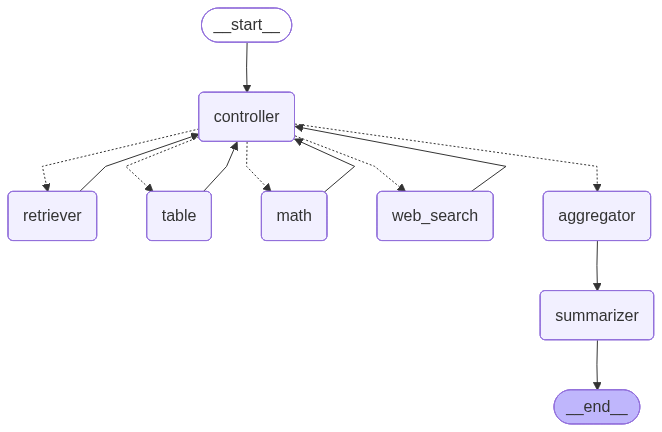

In [93]:
graph.compile()

In [94]:
pipeline=graph.compile()

In [100]:
import asyncio

query="What is the FY2018 capital expenditure amount (in USD millions) for 3M? Give a response to the question by relying on the details shown in the cash flow statement.The metric capital expenditures was directly extracted from the company 10K. The line item name, as seen in the 10K, was: Purchases of property, plant and equipment (PP&E)."
initial_state = {
    "query": query,
    "trace": [],
    "reasoning_trace": [],
    "retrieved_chunks": [],
    "retrieved_metadata": [],
    "extracted_entities": {},
}

result_state = await pipeline.ainvoke(initial_state)

print(result_state["final_answer"])
print("Reasoning Trace:\n", "\n".join(result_state["reasoning_trace"]))
print("Final Trace:\n", result_state["trace"])




Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/tmp/ipykernel_36/3604461157.py:54: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  state["extracted_entities"]["table_data"] = result.dict()
/tmp/ipykernel_36/3604461157.py:61: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  "output": result.dict(),


The FY2018 capital expenditure amount for 3M, as indicated in the cash flow statement under the line item "Purchases of property, plant and equipment (PP&E)," was $1,577 million.
Reasoning Trace:
 The user query specifically asks for a capital expenditure amount from the cash flow statement of 3M, which is likely to be found in relevant text chunks. The retriever agent can fetch the necessary text chunks from the 10K report that contain the information about 'Purchases of property, plant and equipment (PP&E)'.
Retrieved 5 chunks from FAISS index.
The retrieved chunks contain data related to capital expenditures, specifically the line item 'Purchases of property, plant and equipment (PP&E)'. The table agent can interpret this data to extract the FY2018 capital expenditure amount from the provided information.
Table Agent extracted structured data successfully.
The retrieved chunks contain relevant information about capital expenditures, specifically the line item 'Purchases of property,

In [101]:
print(result_state["final_answer"])

The FY2018 capital expenditure amount for 3M, as indicated in the cash flow statement under the line item "Purchases of property, plant and equipment (PP&E)," was $1,577 million.


In [102]:
#JSON Trace
trace_json = json.dumps(result_state["trace"], indent=4)

In [103]:
print(trace_json)

[
    {
        "agent": "controller",
        "decision": "retriever",
        "reasoning": "The user query specifically asks for a capital expenditure amount from the cash flow statement of 3M, which is likely to be found in relevant text chunks. The retriever agent can fetch the necessary text chunks from the 10K report that contain the information about 'Purchases of property, plant and equipment (PP&E)'."
    },
    {
        "agent": "retriever",
        "tool": "FAISS Vector Search",
        "input": "What is the FY2018 capital expenditure amount (in USD millions) for 3M? Give a response to the question by relying on the details shown in the cash flow statement.The metric capital expenditures was directly extracted from the company 10K. The line item name, as seen in the 10K, was: Purchases of property, plant and equipment (PP&E).",
        "output_count": 5,
        "handoff-to": "controller"
    },
    {
        "agent": "controller",
        "decision": "table",
        "reas